In [2]:
import matplotlib as plt

In [2]:
%matplotlib inline 

In [3]:
import numpy as np

In [1]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
import plotly.io

In [7]:
df = pd.read_csv (r'D:\Python-failai\Train.csv')
print(df)

          ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5         

In [ ]:
# Amerikos e-įmonė, prekiaujanti elektronikos priemonėmis, nori turėti įžvalgų iš savo turimų klientų duomenų bazių. 
# Duomenų rinkinį sudaro 10999 pastebėjimai/įžvalgos, viso: 12 kintamųjų.
# Iš 12 kintamųjų, šiame darbe nagrinėju 5 kintamuosius:
# Warehouse block - Sandėlių kompleksas, suskirstytas į sandėlius A,B,C,D,E.
# Mode of shipment  - Prekių pristatymo būdas: Laivu, lėktuvu, sausumos transportu.
# Discount offered - Nuolaida taikoma prekėms.
# Gender - Lytis: Vyrai, Moterys.
# Reached on time (pagrindinis kintamasis) - Laiku pristatytos prekės.

In [8]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
# Ši funkcija padeda greitai ir lengvai apžvelgti duomenų rinkinį.#
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
# Ieškau nulinių verčių, susumavus, matome, kad visos vertės - lygios 0.#

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
# Su "drop" funkcija išmetu nereikalinga eilutę - Customer ID.#

df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [12]:
# Surandu unikalias vertes.#
print(df.nunique())

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64


In [14]:
# Taikau vieną svarbiausių Panda funkcijų - koreliaciją, tikrinu, kaip svarbiausi kintamieji
#koreliuoja vienas su kitu., neigiamos reikšmės rodo koreliacijos nebuvimą, teigiamos - gera koreliaciją.#
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [11]:
df.corr()['Reached.on.Time_Y.N'].sort_values()

Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

<AxesSubplot:>

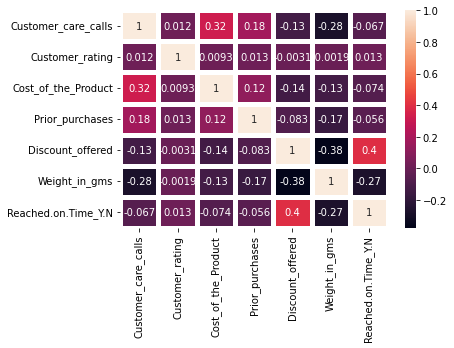

In [15]:
# Naudoju Seaborn bibliotekos grafiką, kuris aiškiai ir vizualiai pateikia coreliacijas.#  

sns.heatmap(df.corr(), annot=True, linewidth=5, linecolor='white')

In [13]:
# analizuoju, kuriama sandėlyje laikoma daugiausia prekių.#
df['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

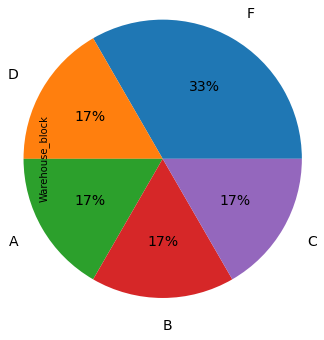

In [16]:
# matome, kad F sandėlyje sandėliuojama daugiausia prekių.#

warehouse = df['Warehouse_block'].value_counts()
plot = warehouse.plot.pie(fontsize=14, autopct='%1.0f%%', labeldistance=1.2, radius=1.6)


<AxesSubplot:xlabel='Warehouse_block', ylabel='Reached.on.Time_Y.N'>

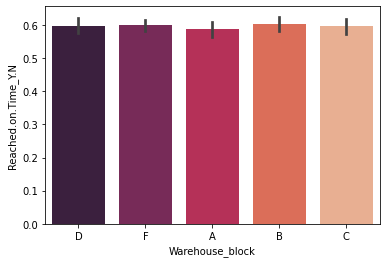

In [17]:
# Analizuoju iš kurio sandėlio, siųstos prekės, Y.N pasiekė laiku.#

sns.barplot(x='Warehouse_block', y='Reached.on.Time_Y.N', data=df, palette='rocket')

In [18]:
# Analizuoju, kuriuo transportu buvo transportuota daugiausia prekių.#

df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

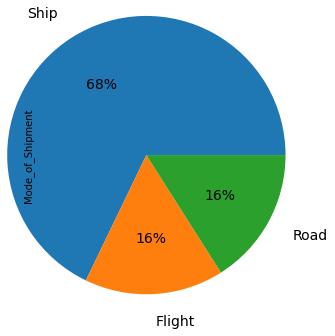

In [18]:
shipping = df['Mode_of_Shipment'].value_counts()
plot = shipping.plot.pie(fontsize=14, autopct='%1.0f%%', labeldistance=1.2, radius=1.6)

In [23]:
df['Discount_offered'].value_counts()

10    860
2     858
6     849
9     845
3     840
     ... 
65     36
26     36
42     35
25     34
30     34
Name: Discount_offered, Length: 65, dtype: int64

In [21]:
# analizuoju, kaip "Pritaikytos nuolaidos" koreliuoja su "Laiku pristatytomis prekėmis".#
# "Pritaikytos nuolaidos" pasižymi aukšta teigiama koreliacija su "Laiku pristatytomis prekėmis", = 40%.#

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

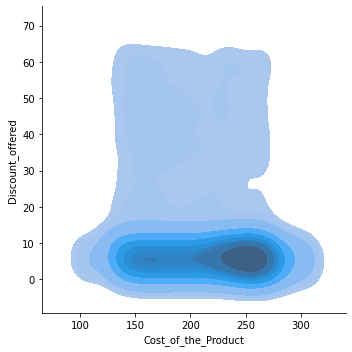

In [22]:
# Koreliacija tarp "Pritaikytos nuolaidos" ir "Produkto kainos" rodo, kad produktams, kurie kainavo apie 250 dolerių, 
# nuolaida buvo suteikta tarp 0-10%.# 

sns.displot(x='Cost_of_the_Product',y='Discount_offered', data=df, kind='kde', palette="light:#5A9", fill=True)

In [23]:
# analizuoju pagal lytį(Moterys,Vyrai), matome, kad pasiskirtymas-apylygis.#
df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

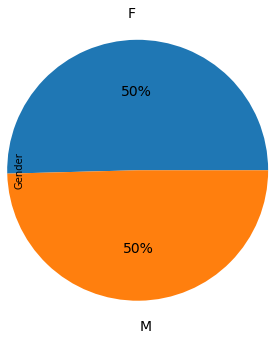

In [26]:
gender = df['Gender'].value_counts()
plot = gender.plot.pie(fontsize=14, autopct='%1.0f%%', labeldistance=1.2, radius=1.5)

<AxesSubplot:xlabel='Customer_rating', ylabel='Cost_of_the_Product'>

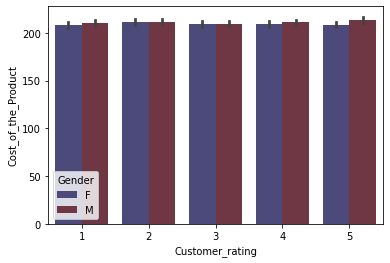

In [27]:
sns.barplot(x='Customer_rating', y='Cost_of_the_Product', palette='icefire', data=df, hue='Gender')